# GETAROUND PROJECT

GetAround is the Airbnb for cars, allowing users to rent cars from individuals for short periods. During the rental process, users must complete a check-in flow at the beginning and a check-out flow at the end. These flows are essential for assessing the state of the car, comparing fuel levels, and measuring the distance driven. The check-in and check-out processes can be completed through three distinct methods:

1. 📱 Mobile Rental Agreement on Native Apps: The driver and owner meet, and both sign the rental agreement on the owner’s smartphone.
2. Connect: The driver doesn’t meet the owner and opens the car with his smartphone.
3. 📝 Paper Contract (negligible)

This notebook is part of a complete project, in addition to the development of an API, MLflow, and a Streamlit application
## Data Analysis

The data analysis part is divided into two main sections:

1) Delay Analysis: Analyze delays in the check-in and check-out processes
2) Price Analysis: Analyze rental prices and factors 

by Eugenia Mellano



In [1]:
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Delay Analysis

In [2]:
df_delay=pd.read_excel("s3://getaround-bucket/get_around_delay_analysis.xlsx")
df_delay.head(20)

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
7,512303,371242,mobile,ended,-44.0,NaN,NaN
8,512475,322502,mobile,canceled,NaN,NaN,NaN
9,513434,256528,connect,ended,23.0,NaN,NaN


In [3]:
df_delay.describe()

,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,16346.000000,1841.000000,1841.000000
mean,549712.880338,350030.603426,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,67.000000,560823.000000,540.000000
max,576401.000000,417675.000000,71084.000000,575053.000000,720.000000


In [4]:
df_delay.isnull().sum()

rental_id                                         0
car_id                                            0
checkin_type                                      0
state                                             0
delay_at_checkout_in_minutes                   4964
previous_ended_rental_id                      19469
time_delta_with_previous_rental_in_minutes    19469
dtype: int64

In [5]:
#replace null values with 0 in the specified columns
#We consider the hypothesis that if a delay was not reported, it means there was none.
#We consider null values as 0, meaning that there was no delay.
df_delay['delay_at_checkout_in_minutes'].fillna(0)

0          0.0
1        -81.0
2         70.0
3          0.0
4          0.0
         ...  
21305      0.0
21306   -337.0
21307    144.0
21308    -76.0
21309     35.0
Name: delay_at_checkout_in_minutes, Length: 21310, dtype: float64

In [6]:
# Calculate the percentage distribution of checkin_type values
checkin_percentage = df_delay["checkin_type"].value_counts(normalize=True) * 100

# Plot the Pie chart
fig = px.pie(names=checkin_percentage.index, 
             values=checkin_percentage.values, 
             title='Percentage Distribution of Checkin Types',
            color_discrete_sequence=px.colors.sequential.Turbo)

# Show the chart
fig.show()


In [7]:
percentage_state = (df_delay['state'].value_counts() / df_delay['state'].count()) * 100
cancelled_mobile_count = df_delay[(df_delay['checkin_type'] == 'mobile') & (df_delay['state'] == 'canceled')].shape[0]
cancelled_connect_count = df_delay[(df_delay['checkin_type'] == 'connect') & (df_delay['state'] == 'canceled')].shape[0]
total_cancelled_count = df_delay[df_delay['state'] == 'canceled'].shape[0]

percentage_cancelled_mobile = (cancelled_mobile_count / total_cancelled_count) * 100
percentage_cancelled_connect = (cancelled_connect_count / total_cancelled_count) * 100

#graph
fig = px.pie(names=['Mobile', 'Connect'], values=[percentage_cancelled_mobile, percentage_cancelled_connect],color_discrete_sequence=px.colors.sequential.Blues_r,
             title='Percentage of Cancelled Check-ins by Type')


# Crear los gráficos con Plotly Express
fig1 = px.pie(names=percentage_state.index, values=percentage_state.values,
               title='Percentage of State Types', color_discrete_sequence=px.colors.sequential.Mint)


# Mostrar los gráficos en la misma fila horizontalmente
fig1.show()
fig.show()



We can see that there is a majority of canceled bookings for the mobile type, which is normal considering that the majority of contracts are of this type

In [22]:
#calculate the number of rows in the 'delay_at_checkout_in_minutes' column greater or same than 0
count_delayed = (df_delay['delay_at_checkout_in_minutes'] >= 0).sum()

#calculate the percentage
percentage_delayed = (count_delayed / (df_delay.shape[0])) * 100

print("Percentage of rows with delay greater than 0:", percentage_delayed, "%")

Percentage of rows with delay greater than 0: 58.120149468238004 %


In [9]:
# Calcular el rango intercuartílico
Q1 = df_delay['delay_at_checkout_in_minutes'].quantile(0.25)
Q3 = df_delay['delay_at_checkout_in_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior para los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower limit for outliers:", lower_bound)
print("Upper limit for outliers:", upper_bound)

# Contar la cantidad de outliers
outliers_count = ((df_delay['delay_at_checkout_in_minutes'] < lower_bound) | (df_delay['delay_at_checkout_in_minutes'] > upper_bound)).sum()
print("Number of outliers:", outliers_count)

# Filtrar los datos para eliminar los valores atípicos
df_delay = df_delay[(df_delay['delay_at_checkout_in_minutes'] >= lower_bound) & (df_delay['delay_at_checkout_in_minutes'] <= upper_bound)]


Lower limit for outliers: -190.5
Upper limit for outliers: 221.5
Number of outliers: 2430


In [10]:
filtered_data = df_delay[df_delay['checkin_type'].isin(['mobile', 'connect'])]
fig = px.box(filtered_data, x='checkin_type',y='delay_at_checkout_in_minutes', title='Delay at Checkout in Minutes for Mobile and Connect Status')
fig.show()

In [11]:
# information same as graph
mean_delay = df_delay['delay_at_checkout_in_minutes'].mean()
median_delay = df_delay['delay_at_checkout_in_minutes'].median()

print("Mean delay:", mean_delay, "minutes")
print("Median delay:", median_delay, "minutes")


Mean delay: 10.153276803679217 minutes
Median delay: 8.0 minutes


Mean delay: With an average delay of around 9 minutes, it suggests that, overall, delays in the vehicle checkout process tend to be moderate, indicating an average delay of approximately 10 minutes.

Median delay: The median delay of 7 minutes indicates that half of all delays in the checkout process are 8 minutes or less, suggesting that most delays are relatively short.

In [12]:
fig = px.box(df_delay, x="time_delta_with_previous_rental_in_minutes", title='Time delta repartition')
fig.show()

In [13]:
df_delay['checkout_status'] = ["Delayed" if x>0 else "On time" for x in df_delay['delay_at_checkout_in_minutes']] 
fig = px.pie(df_delay, names='checkout_status',color_discrete_sequence=px.colors.sequential.Blues_r)
fig.update_layout(title_text='Proportion of late checkout')
fig.show()

More than the half of the users are late at the check out

In [14]:
# Definir los intervalos y etiquetas para los bins
bins = [0, 30, 60, 90, 120, float('inf')]
labels = ['0 to 30m', '30m to 1h', '1h to 1h30m', '1h30m to 2h', 'more than 2h']

# Filtrar el dataframe original para obtener solo las filas con retraso positivo
positive_delay_df = df_delay[df_delay['delay_at_checkout_in_minutes'] > 0]

# Aplicar el corte por bins y calcular el conteo de valores por categoría
delay_bins_positive = pd.cut(positive_delay_df['delay_at_checkout_in_minutes'], bins=bins, labels=labels)
section_counts_positive = delay_bins_positive.value_counts()

# Crear el gráfico de pastel con etiquetas al lado de la figura
fig = px.pie(
    names=section_counts_positive.index,
    values=section_counts_positive.values,
    title='Distribution of Positive Check-out Delays',
    color_discrete_sequence=px.colors.sequential.Blues_r
)

# Actualizar la configuración del diseño para mostrar etiquetas al lado de la figura
fig.update_traces(textposition='outside', textinfo='percent+label')

# Mostrar el gráfico
fig.show()


Less than 60% of users who arrive late at the checkout are delayed by less than an hour.

In [15]:
# Sort the dataframe by 'car_id' and 'rental_id'
rentals_df = df_delay.sort_values(by=['car_id', 'rental_id'])
#df_time_delay = rentals_df.dropna(subset='time_delta_with_previous_rental_in_minutes')
def assign_previous_user_delay(rentals_df):
    # Crear una columna para almacenar el retraso del usuario anterior
    rentals_df['previous_user_delay'] = np.nan

    # Iterar sobre cada fila del dataframe
    for index, row in rentals_df.iterrows():
        previous_ended_rental_id = row['previous_ended_rental_id']

        if pd.notnull(previous_ended_rental_id):
            # Buscar el retraso del usuario anterior usando el ID
            previous_rental_delay = rentals_df.loc[rentals_df['rental_id'] == previous_ended_rental_id, 'delay_at_checkout_in_minutes']

            if not previous_rental_delay.empty:
                # Asignar el retraso del usuario anterior a la columna 'previous_user_delay'
                rentals_df.at[index, 'previous_user_delay'] = previous_rental_delay.iloc[0]

    # Calcular la diferencia de retraso entre las columnas 'time_delta_with_previous_rental_in_minutes' y 'previous_user_delay'
    rentals_df['delay_difference'] = rentals_df['time_delta_with_previous_rental_in_minutes'] - rentals_df['previous_user_delay']
assign_previous_user_delay(rentals_df)
df_time_delay = rentals_df.dropna(subset='time_delta_with_previous_rental_in_minutes')

In [16]:
rentals_df.columns

Index(['rental_id', 'car_id', 'checkin_type', 'state',
       'delay_at_checkout_in_minutes', 'previous_ended_rental_id',
       'time_delta_with_previous_rental_in_minutes', 'checkout_status',
       'previous_user_delay', 'delay_difference'],
      dtype='object')

In [17]:
# time delay between time delta and previous user
df_time_delay['delay_difference'] = df_time_delay['time_delta_with_previous_rental_in_minutes'] - df_time_delay['previous_user_delay']

# Average delta time in minutes
average_delta_delay = df_time_delay['delay_difference'].mean()

# Histogram
fig = px.histogram(df_time_delay, x='delay_difference',color_discrete_sequence=['blue'])

# Add average 
fig.add_trace(go.Scatter(x=[average_delta_delay, average_delta_delay], y=[0, 100], 
                         mode='lines', line=dict(color='red', dash='dash'), 
                         name=f'Average ({round(average_delta_delay / 60)}h)'))

fig.update_layout(title="Average Time Delta with Previous Rental",
                  title_font=dict(size=20),
                  xaxis_title="Difference between Time Delta and Previous User Delay",
                  yaxis_title="Count",
                  showlegend=True)

fig.update_xaxes(range=[-500, 1000])

fig.show()


 - The delay difference is the time between the check out and next check in of the rental.
 - Difference between Time Delta and previous users delay is generaly positive, which means not problematic

In [18]:
# Graph to check percentage of all problematic cases
problematic_cases = df_time_delay[df_time_delay['delay_difference'] < 0]

non_problematic_cases_count = len(df_time_delay) - len(problematic_cases)

# percentages
percentage_problematic_cases = round(100 * len(problematic_cases) / len(df_time_delay), 2)

percentage_non_problematic_cases = 100 - percentage_problematic_cases

# data to use at pie graph
data = {
    'Category': ['Problematic Cases', 'Non-Problematic Cases'],
    'Percentage': [percentage_problematic_cases, percentage_non_problematic_cases]
}
df_pie = pd.DataFrame(data)
fig = px.pie(df_pie, values='Percentage', names='Category', 
             title='Distribution of Problematic Cases vs. Non-Problematic Cases',
             color_discrete_sequence=px.colors.sequential.Blues_r)

# Mostrar el gráfico
fig.show()


Most of delay cases are not problematics

In [19]:
def calculate_threshold_metrics(df_delay, thresholds=[30,40,50, 60, 70,80,90,100,110,120]):
    """
    Calculate rental loss and problematic case metrics for specified time thresholds.
    
    Parameters:
    - df_delay (DataFrame): Input DataFrame containing rental delay information.
    - thresholds (list): List of time thresholds (in minutes) for analysis.
    
    Returns:
    - DataFrame: DataFrame with calculated metrics for each specified time threshold.
    """
    # Column names for the results DataFrame
    columns = [
        'Limit (minutes)',
        'Total Cases Impacted',
        'Percentage Rentals Delay (Total Rentals)',
        'Cases Impacted without problem',
        'Percentage Loss Rental',
        'Problematic Cases (Count)',
        'Solved Problematic Cases',
        'Percentage Solved of all Problematic'
    ]

    # List to store the data for each threshold
    df_thresholds = []

    # Calculate total number of rentals in df_delay

    # Iterate over each defined time threshold
    for threshold in thresholds:
        # Filter rentals that have a time difference greater than the specified threshold
        rentals_above_threshold = df_time_delay[df_time_delay['time_delta_with_previous_rental_in_minutes'] > threshold]
        
        # Calculate the number of rentals lost (that exceed the time threshold)
        cases_impacted_count = len(df_time_delay) - len(rentals_above_threshold)
        
        
        # Calculate the percentage of rentals lost relative to the total delayed rentals
        rental_delay_percetage_all = 100 * cases_impacted_count / len(df_delay)
        
        # Filter problematic cases where delay_difference is negative (indicative of timing issues between rentals)
        problematic_cases = rentals_above_threshold[rentals_above_threshold['delay_difference'] < 0]
        
        # Calculate the number of problematic cases
        problematic_cases_count = len(problematic_cases)

        # Calculate solved cases
        rentals_down_threshold = df_time_delay[df_time_delay['time_delta_with_previous_rental_in_minutes'] < threshold]
        problematic_cases_solved = rentals_down_threshold[rentals_down_threshold['delay_difference'] < 0]
        cases_impacted_no_problem = cases_impacted_count - len(problematic_cases_solved)

        # Calculate percentage of solved cases from All problematic cases
        percentage_solved = 100 * len(problematic_cases_solved) / len(rentals_df[rentals_df['delay_difference'] < 0])

        # Calculate percentage of cases without problem affected by the threshold
        percentage_lost_rental = 100 * cases_impacted_no_problem / len(df_delay)
        # Create a dictionary with the results for this threshold
        data = {
            'Limit (minutes)': threshold,
            'Total Cases Impacted': cases_impacted_count,
            'Percentage Rentals Delay (Total Rentals)': rental_delay_percetage_all,
            'Cases Impacted without problem': cases_impacted_no_problem,
            'Percentage Loss Rental': percentage_lost_rental,
            'Problematic Cases (Count)': problematic_cases_count,
            'Solved Problematic Cases': len(problematic_cases_solved),
            'Percentage Solved of all Problematic' :percentage_solved
        }
        
        # Append the data to the list
        df_thresholds.append(data)

    # Create a DataFrame from the list of dictionaries
    df_thresholds = pd.DataFrame(df_thresholds, columns=columns)

    return df_thresholds

# Calculate threshold metrics for df_time_delay using thresholds
result_df = calculate_threshold_metrics(df_delay)
result_df


,Limit (minutes),Total Cases Impacted,Percentage Rentals Delay (Total Rentals),Cases Impacted without problem,Percentage Loss Rental,Problematic Cases (Count),Solved Problematic Cases,Percentage Solved of all Problematic
0,30,291,2.091118,213,1.530612,27,78,63.414634
1,40,291,2.091118,195,1.401265,27,96,78.048780
2,50,291,2.091118,195,1.401265,27,96,78.048780
3,60,417,2.996551,321,2.306697,14,96,78.048780
4,70,417,2.996551,308,2.213280,14,109,88.617886
5,80,417,2.996551,308,2.213280,14,109,88.617886
6,90,476,3.420523,367,2.637252,9,109,88.617886
7,100,476,3.420523,362,2.601322,9,114,92.682927
8,110,476,3.420523,362,2.601322,9,114,92.682927
9,120,578,4.153492,464,3.334291,3,114,92.682927


In [20]:
# Graph of Problematic cases (solved or not)
fig = px.line(result_df, x="Limit (minutes)", y=["Problematic Cases (Count)", "Solved Problematic Cases"], 
              labels={"Limit (minutes)": "Thresholds", "value": "Count"},
              title="Problematic and Solved by thresholds",
              color_discrete_map={"Problematic Cases (Count)": "red", "Solved Problematic Cases": "green"})

# Mostrar el gráfico
fig.show()


In [21]:
# Create graph of potential Loss Rental
fig = px.line(result_df, x="Limit (minutes)", y="Percentage Loss Rental", title='Potential Loss Rental',
              labels={"Limit (minutes)": "Thresholds", "value": "Percentage Loss Rental"},
              text=result_df["Percentage Loss Rental"].apply(lambda x: f"{x:.2f}%"))

# This is to configure the text in the line and color
fig.update_traces(textposition='bottom center', line=dict(color='maroon'))

fig.show()



We can observe that as the thresholds increase, more cases are resolved, but potential customers are also lost. Therefore, we can interpret that a threshold of around 70 minutes would be optimal to minimize Rental Loss and solve approximately 80% of the problematic cases.

# Pricing Analysis

In [6]:
df_pricing = pd.read_csv("s3://getaround-bucket/get_around_pricing_project.csv")
display(df_pricing)

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,4838,Toyota,39743,110,diesel,black,van,False,True,False,False,False,False,True,121
4839,4839,Toyota,49832,100,diesel,grey,van,False,True,False,False,False,False,True,132
4840,4840,Toyota,19633,110,diesel,grey,van,False,True,False,False,False,False,True,130
4841,4841,Toyota,27920,110,diesel,brown,van,True,True,False,False,False,False,True,151


In [9]:
df_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 4843 non-null   int64 
 1   model_key                  4843 non-null   object
 2   mileage                    4843 non-null   int64 
 3   engine_power               4843 non-null   int64 
 4   fuel                       4843 non-null   object
 5   paint_color                4843 non-null   object
 6   car_type                   4843 non-null   object
 7   private_parking_available  4843 non-null   bool  
 8   has_gps                    4843 non-null   bool  
 9   has_air_conditioning       4843 non-null   bool  
 10  automatic_car              4843 non-null   bool  
 11  has_getaround_connect      4843 non-null   bool  
 12  has_speed_regulator        4843 non-null   bool  
 13  winter_tires               4843 non-null   bool  
 14  rental_p

In [10]:
df_pricing.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
df_pricing.describe()

,mileage,engine_power,rental_price_per_day
count,4.843000e+03,4843.00000,4843.000000
mean,1.409628e+05,128.98823,121.214536
std,6.019674e+04,38.99336,33.568268
min,-6.400000e+01,0.00000,10.000000
25%,1.029135e+05,100.00000,104.000000
50%,1.410800e+05,120.00000,119.000000
75%,1.751955e+05,135.00000,136.000000
max,1.000376e+06,423.00000,422.000000


In [30]:

fig = px.histogram(df_pricing, x='rental_price_per_day', title='Distribution of Rental Prices per Day', 
                   labels={'rental_price_per_day': 'Rental Price per Day', 'count': 'Count'},
                   marginal='rug')


fig.show()


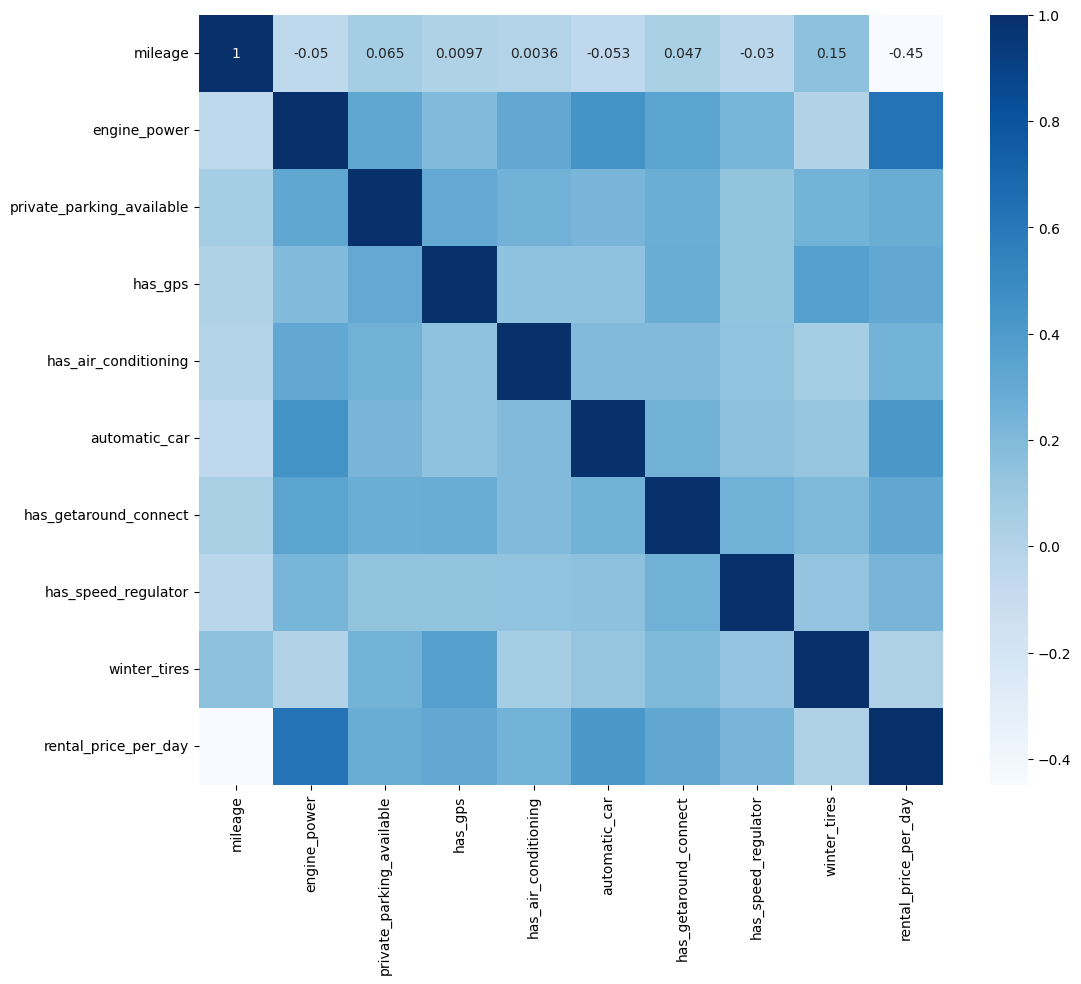

In [13]:
plt.figure(figsize=(12,10));
sns.heatmap(df_pricing.corr(numeric_only=True),cmap='Blues',annot=True);

We can observe a strong positive correlation between engine power and rental price per day, as well as a negative correlation between price and mileage. Let's take a closer look at these two variables

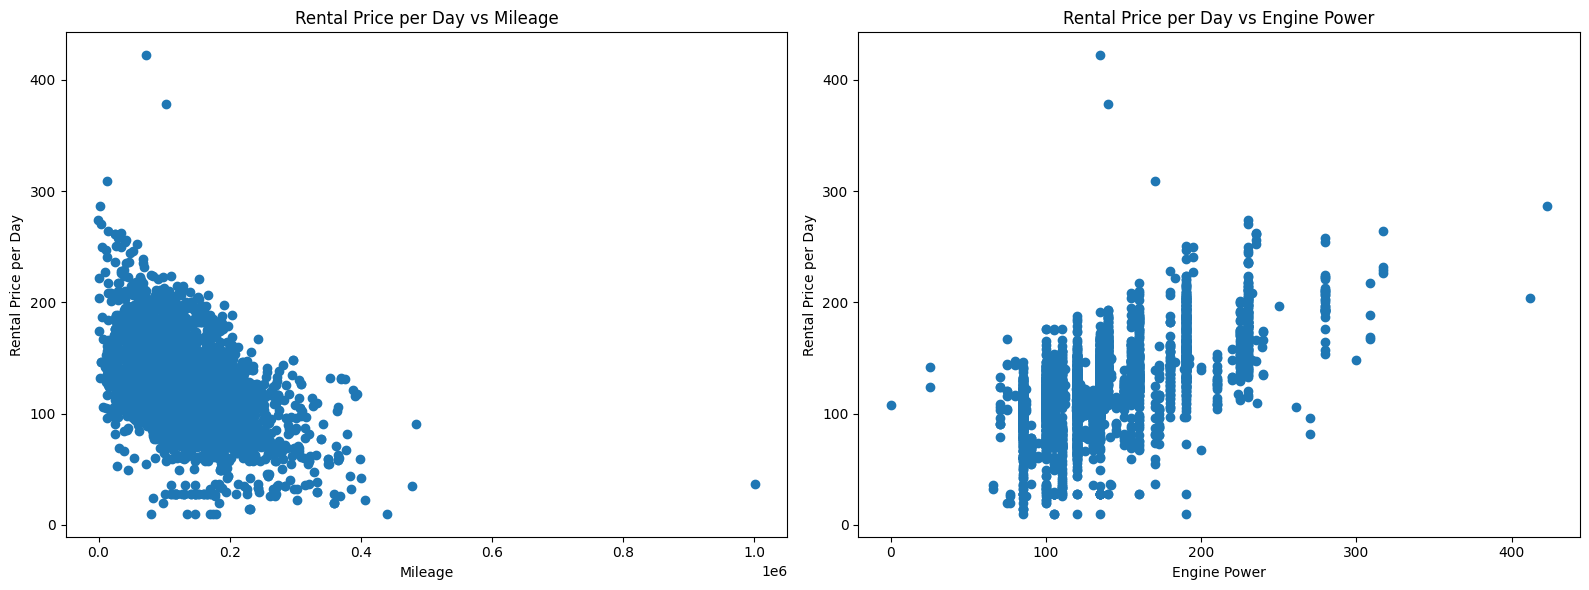

In [14]:
plt.figure(figsize=(16, 6))

# first graph: 'mileage'
plt.subplot(1, 2, 1)
plt.scatter(df_pricing['mileage'], df_pricing['rental_price_per_day'])
plt.title('Rental Price per Day vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Rental Price per Day')

# second graph: 'engine_power'
plt.subplot(1, 2, 2)
plt.scatter(df_pricing['engine_power'], df_pricing['rental_price_per_day'])
plt.title('Rental Price per Day vs Engine Power')
plt.xlabel('Engine Power')
plt.ylabel('Rental Price per Day')

plt.tight_layout()
plt.show()


In [10]:
features = ['model_key', 'fuel', 'paint_color', 'car_type']
for feature in features:
    fig = px.bar(df_pricing, x=feature, title=f'{feature} Distribution',color_discrete_sequence=px.colors.sequential.ice,color=feature)
    fig.show()

- Citroen, Peugeot, Audi, and BMW are the car brands with the highest availability. 
- It's also noticeable a clear dominance of diesel in terms of fuel.
- Estate, Sedan, and SUV as the types of cars with the most offers.